In [1]:
# We begin our exploratory data analysis by loading our standard modules.
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\vikra\Anaconda3\envs\py35\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
train = pd.read_csv(os.path.join('../data', 'train.csv'))
test = pd.read_csv(os.path.join('../data', 'test.csv'))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


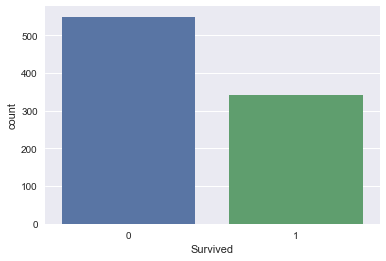

In [10]:
train.head()
train['Survived'].value_counts(normalize=True)
sns.countplot(train['Survived'])

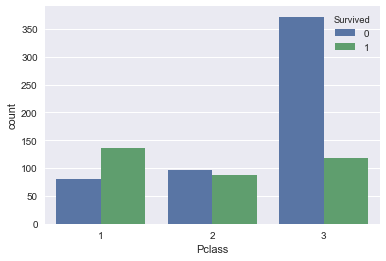

In [14]:
# Pclass analysis 
train['Survived'].groupby(train['Pclass']).mean()
sns.countplot(train['Pclass'], hue=train['Survived'])

In [17]:
# analysis of name, we can see if titles in the name have impact on survival . 
# People with longer name has more probability of survival.
train['Name'].head()
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()
train['Survived'].groupby(train['Name_Title']).mean()
train['Name_Len'] = train['Name'].apply(lambda x: len(x))
train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean()

Name_Len
[12, 19]    0.220588
(19, 23]    0.301282
(23, 27]    0.319797
(27, 32]    0.442424
(32, 82]    0.674556
Name: Survived, dtype: float64

In [18]:
pd.qcut(train['Name_Len'],5).value_counts()

[12, 19]    204
(23, 27]    197
(32, 82]    169
(27, 32]    165
(19, 23]    156
Name: Name_Len, dtype: int64

In [20]:
# analysis of sex

train['Sex'].value_counts(normalize=True)
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [21]:
# Age
# There are 177 nulls for Age, and they have a 10% lower survival rate than the non-nulls. 
# Before imputing values for the nulls, 
# we will include an Age_null flag just to make sure we can account for this characteristic of the data.

train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [23]:
# Upon first glance, the relationship between age and survival appears to be a murky one at best. 
# However, this doesn't mean that the variable will be a bad predictor; 
# at deeper levels of a given decision tree, a more discriminant relationship might open up.

train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()
pd.qcut(train['Age'],5).value_counts()

[0.42, 19]    164
(31.8, 41]    144
(41, 80]      142
(19, 25]      137
(25, 31.8]    127
Name: Age, dtype: int64

In [25]:
# SibSp
# Upon first glance, I'm not too convinced of the importance of this variable. 
# The distribution and survival rate between the different categories does not give me much hope.

train['Survived'].groupby(train['SibSp']).mean()
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [28]:
# Parch
# Same conclusions as Sibsp: passengers with zero parents or children had a lower likelihood of survival than otherwise, 
# but that survival rate was only slightly less than the overall population survival rate.
train['Survived'].groupby(train['Parch']).mean()
train['Parch'].value_counts()

# When we have two seemingly weak predictors, one thing we can do is combine them to get a stronger predictor. 
# In the case of SibSp and Parch, we can combine the two variables to get a 'family size' metric, 
# which might (and in fact does) prove to be a better predictor than the two original variables.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [29]:
# Ticket
# The Ticket column seems to contain unique alphanumeric values, 
# and is thus not very useful on its own. However, we might be able to extract come predictive power from it.

train['Ticket'].head(n=10)

# One piece of potentially useful informatin is the number of characters in the Ticket column. 
# This could be a reflection of the 'type' of ticket a given passenger had, which could somehow indicate their chances of survival.
# One theory (which may in fact be verifiable) is that some characteristic of the ticket could indicate the location of the 
# passenger's room, which might be a crucial factor in their escape route, and consequently their survival.

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [31]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))
train['Ticket_Len'].value_counts()



6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

In [32]:
# Another piece of information is the first letter of each ticket, which, again, might be indicative of a certain attribute of the 
# ticketholders or their rooms.
train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])
train['Ticket_Lett'].value_counts()

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64